In [60]:
import scipy.stats as sps
import numpy as np
from matplotlib import pyplot as plt

Set simulation parameters.

In [61]:
num_chains = 500000
max_time = 14 * 24 * 3600

switch_freq0 = 0.2
switch_freq1 = 0.35

Text(0.5, 1.0, 'Time')

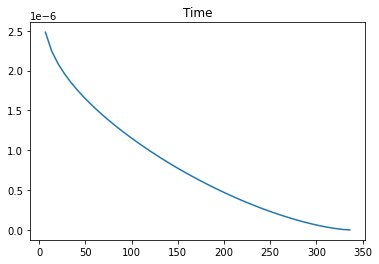

In [62]:
head_time_dist = sps.beta(0.9, 2.5, scale = max_time)
x = np.linspace(0, int(max_time / 3600))
plt.plot(x, head_time_dist.pdf(x * 3600))
plt.title('Time')

Text(0.5, 1.0, 'Player Experience')

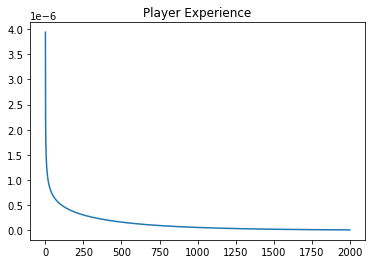

In [63]:
alpha = 0.7
beta = 1 / (3600 * 600)
head_exp_dist = sps.gamma(a = alpha, scale = 1 / beta)
x = np.linspace(0, 2000, 10000)
plt.plot(x, head_exp_dist.pdf(x * 3600))
plt.title('Player Experience')

Text(0.5, 1.0, 'Duration')

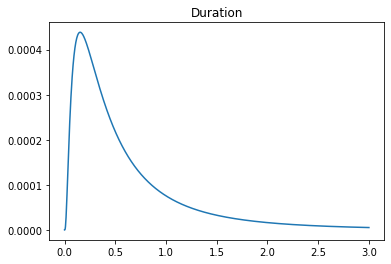

In [64]:
run_dur_dist = sps.lognorm(1, scale = 1500, loc = 1)
x = np.linspace(0, 3, 1000)
plt.plot(x, run_dur_dist.pdf(x * 3600))
plt.title('Duration')

In [65]:
class exp_beta_mix:
    def __init__(self, scale1 = 1, loc1 = 1, alpha = 1, beta = 1, loc2 = 0, scale2 = 1, p = 0):
        self.alpha = alpha
        self.beta = beta
        self.loc1 = loc1
        self.loc2 = loc2
        self.scale1 = scale1
        self.scale2 = scale2
        self.p = p
        
    def pdf(self, x):
        return ((1 - self.p) * sps.expon.pdf(x, loc = self.loc1, scale = self.scale1) 
                + self.p * sps.beta.pdf(x, self.alpha, self.beta, loc = self.loc2, scale = self.scale2))
    
    def rvs(self):
        if sps.bernoulli.rvs(self.p) == 0:
            return sps.expon.rvs(loc = self.loc1, scale = self.scale1)
        else:
            return sps.beta.rvs(self.alpha, self.beta, loc = self.loc2, scale = self.scale2)

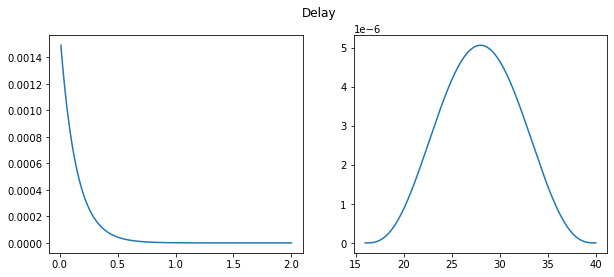

In [66]:
run_delay_dist = exp_beta_mix(loc1 = 1, scale1 = 500,
                              alpha = 4, beta = 4, loc2 = 16 * 3600, scale2 = 3600 * 24, p = 0.2)

plt.figure(figsize = (10, 4))
plt.suptitle('Delay')

plt.subplot(121)
x = np.linspace(0.01, 2, 1000)
plt.plot(x, run_delay_dist.pdf(x * 3600))

plt.subplot(122)
x = np.linspace(16, 40, 1000)
plt.plot(x, run_delay_dist.pdf(x * 3600))

Create chains and write to file.

In [69]:
with open('simulated_data_2w_big.txt', 'w') as f:
    run_id = 1
    for i in range(num_chains):
        exp = np.floor(head_exp_dist.rvs()).astype(int)
        dur = np.floor(run_dur_dist.rvs()).astype(int)
        time = np.floor(head_time_dist.rvs()).astype(int)
        mode = 0

        runs.append((run_id, exp, dur, time, mode, i))
        run_id += 1

        while time <= max_time:
            exp = exp + dur
            dur = run_dur_dist.rvs().astype(int)
            time = time + dur + np.floor(run_delay_dist.rvs()).astype(int)
            if mode == 0:
                if sps.bernoulli.rvs(switch_freq0) == 1:
                    mode = 1
            else:
                if sps.bernoulli.rvs(switch_freq1) == 1:
                    mode = 0
                    
            f.write('{},{},{},{},{},{}\n'.format(run_id, exp, dur, time, mode, i))
            run_id += 1